# Introduction to Julia for Scientific Computing

## Variables and Datatypes

Assigning values to variables is most analogous to Python or MATLAB. Julia is dynamically-typed, meaning that types are checked at run-time; i.e, types don't need to be explicitly specified. Variables are case-sensitive and UTF-8 encoding is allowed. Pretty much everything but keywords (e.g: else, for, etc.) are allowed.

We can check the type of a variable with the "typeof" function.

Note that Julia lets you redefine built-in constants or functions (usually HORRIBLE) if they haven't been called prior. If a function or variable has been defined/called from a package/dependency, it can't be redefined without resetting your kernel.

Furthermore, we can define variables with existing operators:

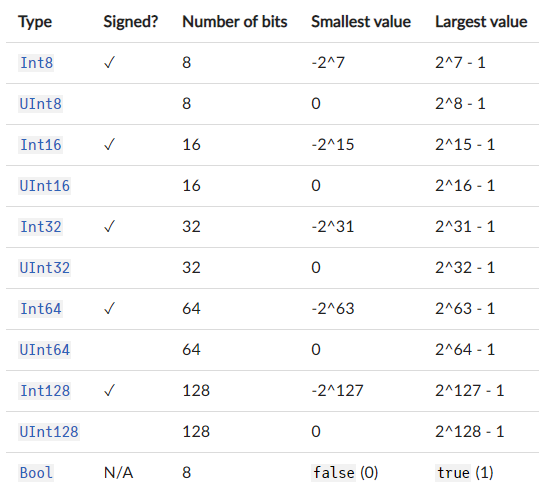 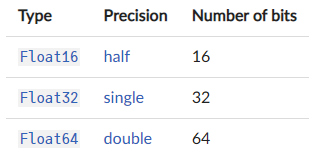

source: https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/

The eps function provides the difference between any two "adjacent" values. I.e, the minimum possible difference between values in a datatype, or the difference between a number and the next representable number.

### Strings:

Apply the $ operator to perform mathematical operations, and transform to string type.

Apply the * operator to concantenate/combine strings.

One can also define complex and rational numbers, with functions/methods defined for each.

### Data structures:

Arrays are mutable and an ordered sequence of elements. NOTE: As cringy as it is, Julia starts indexing at 1 (as opposed to 0).

Tuples are immutable and an ordered sequence of elements.

Dictionaries are mutable and relate to values to each other. Variables are "ordered" alphabetically.

## Operations

As opposed to python, multiplication is **implied** when a number and a variable are next to each other.

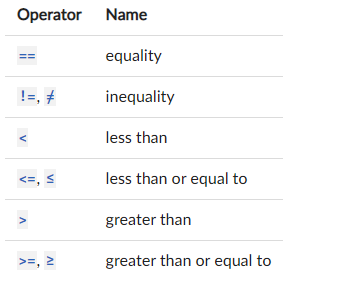 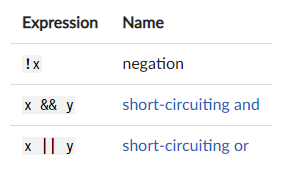 

Source: https://docs.julialang.org/en/v1/manual/mathematical-operations/#Numeric-Comparisons

### Broadcasting:

One can treat arrays like a matrix or like an array. I.e, one array operations element-wise (by placing a "." before an operation), or classical matrix operations.

This is the same as:

For a matrix X: 

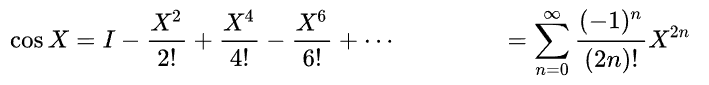

$AA^{-1} = I_2$

Most elementary operations you can think of: https://docs.julialang.org/en/v1/manual/mathematical-operations/#Rounding-functions

## Functions/Methods and Multiple Dispatch

We use "return" to gather an output from our function. This can be any given line in your function.

### Dispatch:

One can declare an input type by writing ::type along with the variable name. Furthermore, one can do this for multiple types, **for the same function name**.

One can define the return type similarly:

**Any operator is also a function**.

See sect. on type inference algorithm for further discussion on multiple dispatch.

Additionally, optional arguments can be specified by defining them for a specific value in the input (this is done after any other non-optional arguments are defined). Keyword arguments are also option, and are added by appending a ";" before their inputs.

For an object falling straight down, with no initial velocity:
$$v = v_0+gt = 9.8t$$

## Control Flow 

Control flow includes: 
- Loops
- Compound expressions (for writing multiple lines in single functions/objects)
- Logical operators
- If-else-elseif and ?: (ternary operator)
- Exceptions
- Tasks

### Loops: 

As always, for/while loops repeat a process until a condition is met. In general, for loops are iterated over a known number of iterations, and while loops are iterated until a given condition is not met. Every loop requires a final end statement. One can quickly define a compact list with the colon syntax:

### Compound expressions:

A "begin" block, and the ";" syntax perform all operations on their inside contents. A begin block has an end statement. Both can be single or multiline.

### If-else-elseif and ?:

The "?" and ":" are used in conjuction as a conditional statement. Consider (x ? y : z). x is a condition, and this line evaluates to y if x is true, and to z if x is false.

Approximate $\pi$:
$$4arctan(1) = \pi$$
$$and \ arctan(z) = \sum_{n=0}^{\infty}\frac{(-1)^nz^{2n+1}}{2n+1}$$
$$\Longrightarrow \pi = 4(1-1/3+1/5-1/7...)$$


List all numbers between 1 and N that are prime:

### Exception Handling:

One can create errors by using the "throw" or "error" method.

Try/catch statements check if something is evaluated to an error inside the "try" statement, and if so, code inside the "catch"statement is ran. 

One can replace the "catch" statement with "finally" to continue running the code even if the exception causes you to exit a process.

## Constructors

Constructors are the only paradigm analogous to objects in Julia, and create instances of composite types.

Constructors can be redefined based on the input (much like multiple dispatch).

One can set conditions on the type of object generated by a constructor. One must use the function "new" inside of the struct to create the wanted type. E.g: suppose you want to state that your complex number is not a pure real, or a pure imaginary:

Constructing rationals: https://docs.julialang.org/en/v1/manual/constructors/#Case-Study:-Rational

## Working With Arrays

Arrays will be the primary data structure used for scientific computing. Julia places great emphasis in array creation, typing, and operations.

### Indexing:

Taking a row:

Taking a column:

Taking first N rows:

"end" index count backwards:

### Manipulating Matrices:

Row vectors:

Column vectors:

**Do not use commas when dealing with a 2D array.**

Transpose (use ' for hermitian transpose):

### Important functions/methods:

"similar" creates a matrix with the same dimensions.

Check https://cheatsheets.quantecon.org/ for more examples, and comparisons to Python/MATLAB.

## Packages and Basic Numerical Methods

In [ ]:
# using Pkg
# Pkg.add("funnypackages")
# using funnypackages

### Calculus:

Solve for: $\frac{\partial f}{\partial x_1}|_{x_1 = 1, x_2 = \pi/2} = 1, \ and \ \frac{\partial f}{\partial x_2}|_{x_1=1, x_2 = 0} = 1,$ where $f(x_1,x_2) = x_1sin(x_2)$

The above will return a vector with $\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}$ as your first and second elements respectively.

Solve: $\int_0^1 e^{-x^2} \, dx$

Take $g(x) = xe^{x},$ then:
$$\frac{dg}{dx} = (x+1)e^x \ and \ \int_0^x gdx = \left(x-1\right)\mathrm{e}^x+1$$

### Linear Algebra:

Solve Ax = b with "A\b".

# Extra
This section will largely borrow from MIT's SciML class (18.337J/6.338J: Parallel Computing and Scientific Machine Learning): https://book.sciml.ai/

## Serial Code

Julia is a row major programming language. I.e, iterating along values that are along the cache line (rows) will make code slightly faster.

Allocation can be subdivided into stack and heap allocation. The former is considerably quicker, since variables are kept in contiguous memory. For this to occur, however, the size and type of the variable must be known at the compile time. Heap allocation is used whenever this is not the case.

Furthermore, increasing the number of allocations creates a larger overhead for a function call.

In general, most of these optimizations are valuable for small array sizes. 

Julia has memory of previously called functions/methods. If a function for which a specific input has already been calculated is called again, it will simply recall its previous assignment.

## Julia's Compiler and Type-inference Algorithm

A variable type tells the compiler how to store and decode the allotted memory. This is why languages like C - where types are specificied prior to operations - are so cost-effective. Types already are set in stone, static, and operations are very well-defined at runtime for each particular input/output type. 

On the polar opposite of the spectrum, Python has all variables untyped prior to runtime. An operation like simple multiplication then has to have a version for all primitive types. This poses **both a memory and runtime overhead**, and is one of the primary reasons Python is embarrasingly slow.

The reason we say Julia has a "just-ahead-of-time" compiler, is because prior to runtime, a type-inference algorithm determines the types of relevant inputs and outputs. Take the following code: 

a = 2

b = 4
a + b

The algorithm easily determines that a and b are int types. If it can then determine the type of a+b, then after this algorithm, this code should run analogously to C. This might sounds like a large overhead cost, but in practice it's negligible (especially if a,b are array with a specific type, since the algorithm needs to only be ran once compared to the cost of NxN operations).

In tandem with multiple dispatch, assigning input types to functions, and defining a particular method for each input type then allows for a very simplistic algorithm, where a particular method for each type is chosen, and where both the inputs and outputs might already be defined. This is analogous to recalling a value from an array, vs. calculating that value:

This doesn't necessarily mean that making a function over a very specific type will be far faster than an untyped function. Particularly, because Julia is smart enough to consider an untyped function as a generic function over possible methods. The only overhead saved on by defining a function over 1 specific type is checking what method to use (which is very negligible).

One can check how the type-inference algorithm functions using InteractiveUtils' @code_warntype.